In [ ]:
import matplotlib
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
%matplotlib inline

# Traning Dataset loading

In [ ]:
colnames=['Text'] 
data = pd.read_csv('train_text.csv', error_bad_lines=False, names=colnames, header=None)

In [ ]:
data[:2]

,Text
0,QT @user In the original draft of the 7th book...
1,Ben Smith / Smith (concussion) remains out of ...


# Library for preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
data.shape

(36301, 1)

# Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization

In [ ]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['cleanText']=data['Text'].map(lambda s:preprocess(s)) 

# textblob library to extract the polarity score to find sentiments

In [ ]:
# textblob library to extract the polarity score to find sentiments

import nltk
from textblob import  TextBlob
data['Polarity Score']=""
data['sentiment']=""
#df2 = pd.DataFrame(columns=['text', 'sentiment', 'score'])
data['cleanText']=data['cleanText'].astype(str)
for i in range(len(data)):
    sentiment = TextBlob(data['cleanText'][i])
    a=sentiment.sentiment.polarity
    #df2.loc[i] = [data['cleanText'][i]]+[str(0)]+ [a]
    data["Polarity Score"][i]=a

for i in range(len(data)):
    if(data['Polarity Score'][i]>0):
        data['sentiment'][i]=1
    elif(data['Polarity Score'][i]==0):
        data['sentiment'][i]=0
    else:
        data['sentiment'][i]=-1

# Count for postive, negative, and neutral sentiment using textblob 

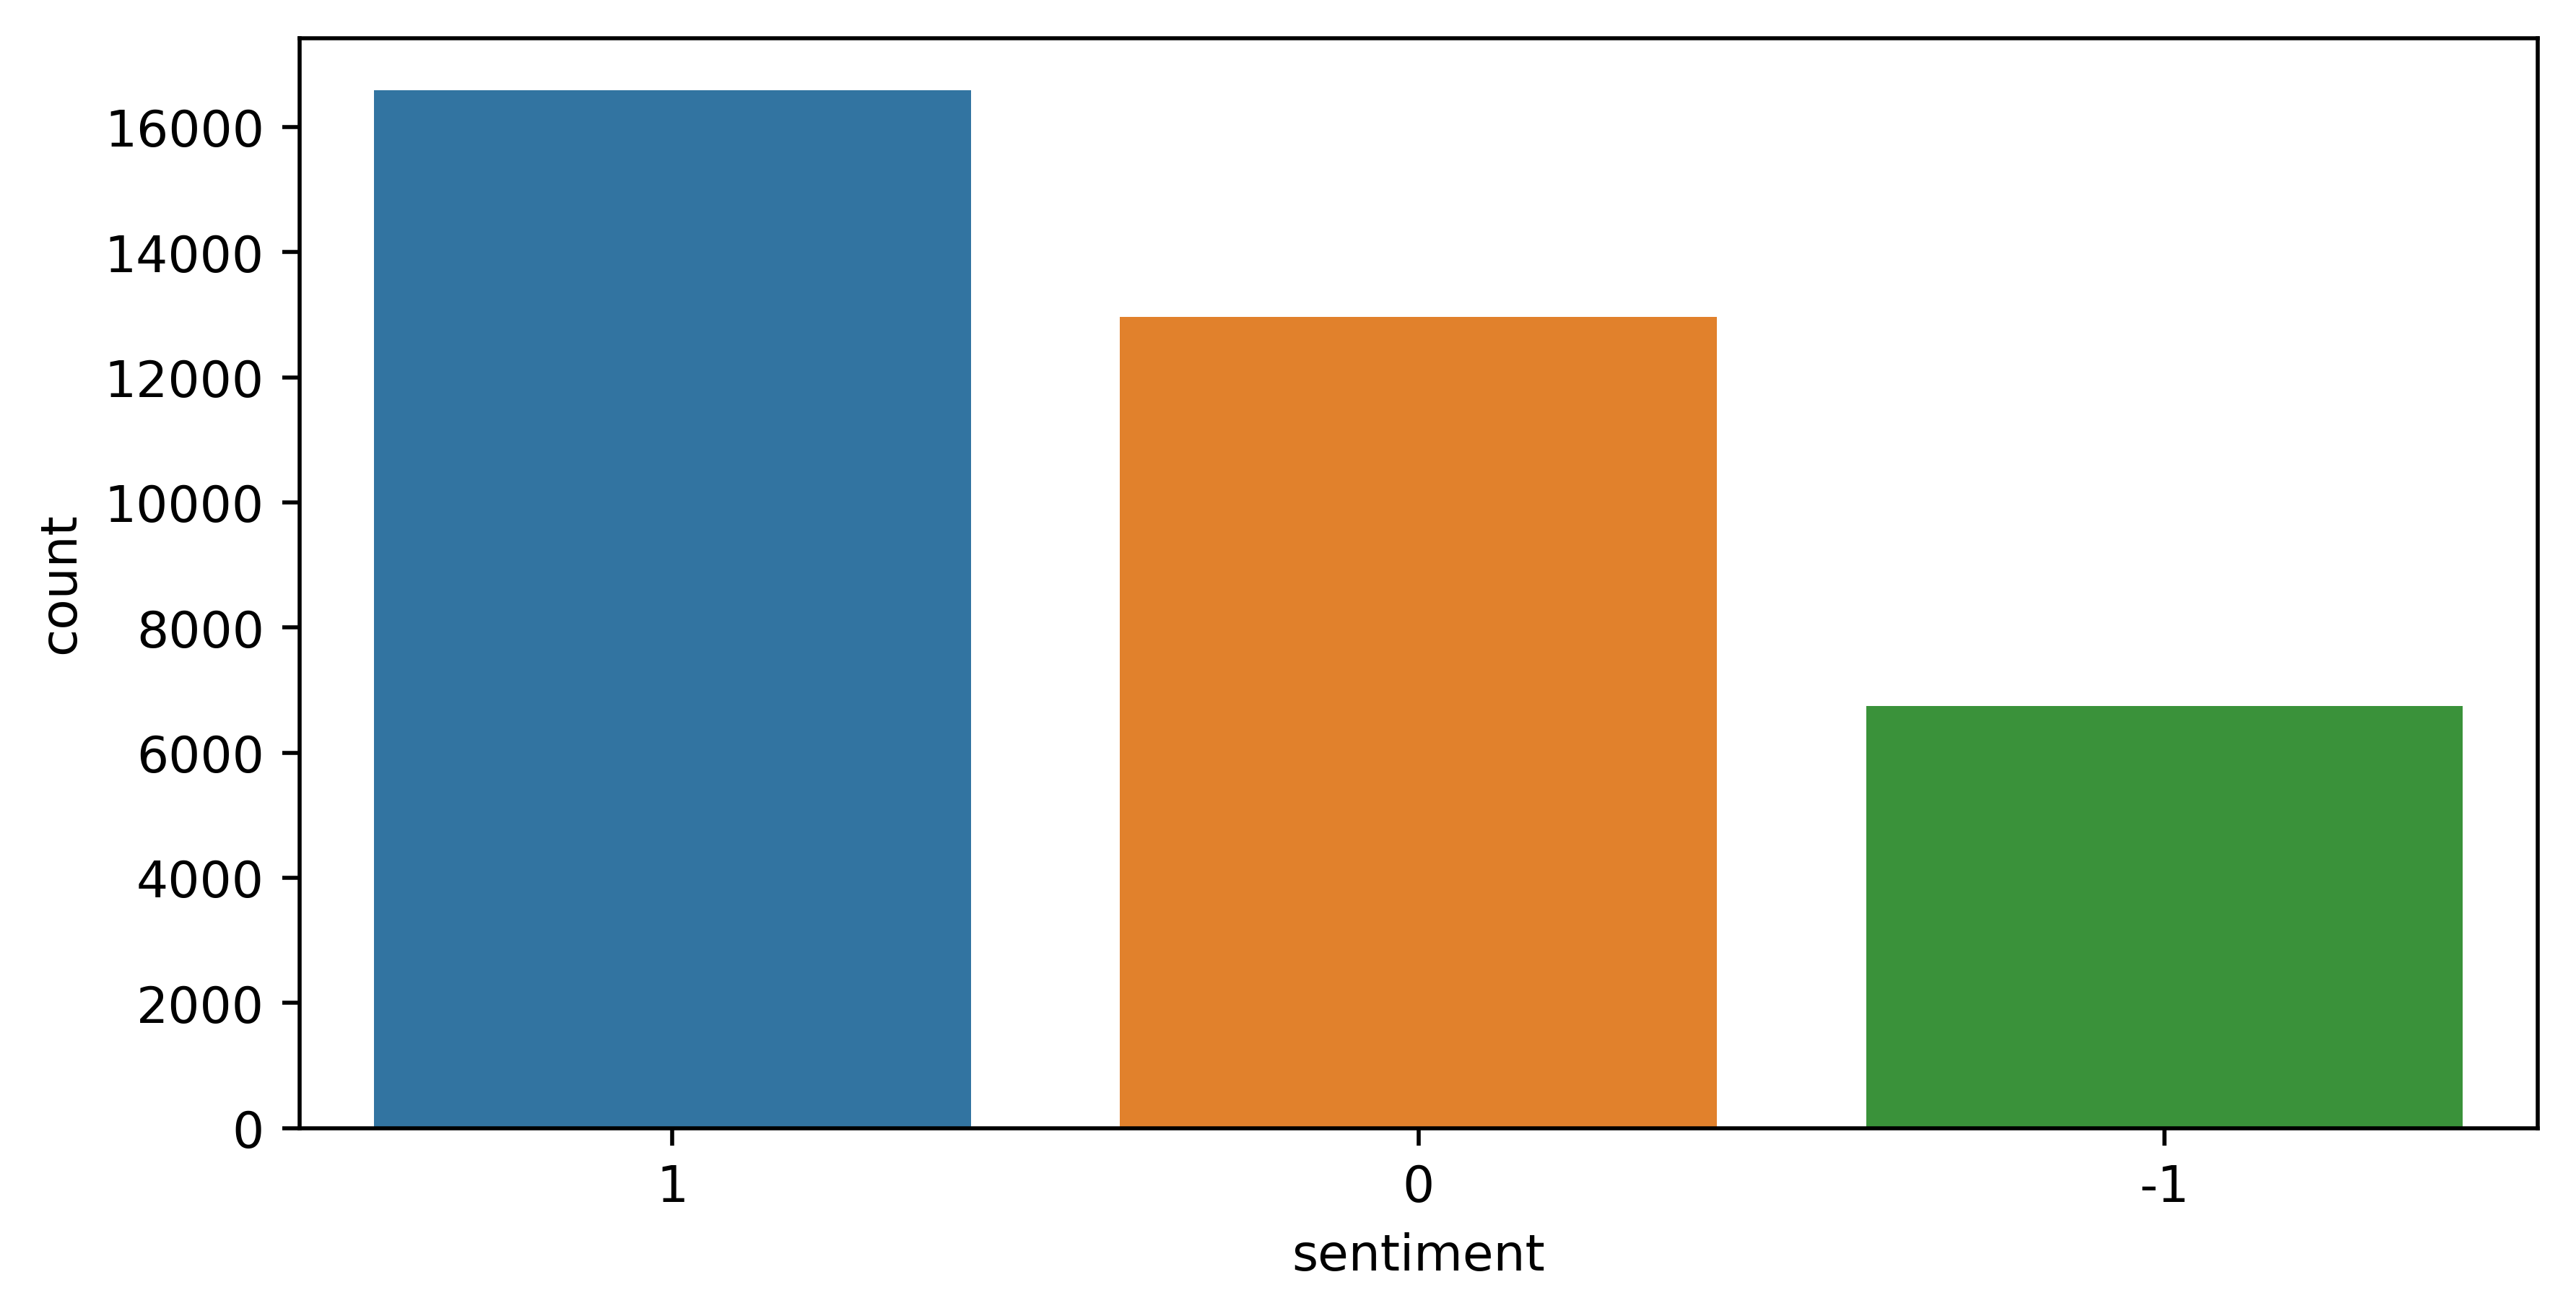

In [ ]:
from matplotlib import pyplot
y = data.sentiment         
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=data.sentiment.value_counts().iloc[:15].index )   
plt.savefig('fig3.png')

# Save preprocessed training  file

In [ ]:
data.to_csv("train_preprocessd_data.csv")

# Test data preprocessing

In [ ]:
colnames=['Text'] 
data = pd.read_csv('test_text.csv', error_bad_lines=False, names=colnames, header=None)

In [ ]:
data[:2]

,Text
0,@user @user what do these '1/2 naked pics' hav...
1,OH: “I had a blue penis while I was this” [pla...


In [ ]:
data.shape

(11762, 1)

# Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization

In [ ]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['cleanText']=data['Text'].map(lambda s:preprocess(s)) 

# textblob library to extract the polarity score to find sentiments

In [ ]:
# textblob library to extract the polarity score to find sentiments

import nltk
from textblob import  TextBlob
data['Polarity Score']=""
data['sentiment']=""
#df2 = pd.DataFrame(columns=['text', 'sentiment', 'score'])
data['cleanText']=data['cleanText'].astype(str)
for i in range(len(data)):
    sentiment = TextBlob(data['cleanText'][i])
    a=sentiment.sentiment.polarity
    #df2.loc[i] = [data['cleanText'][i]]+[str(0)]+ [a]
    data["Polarity Score"][i]=a

for i in range(len(data)):
    if(data['Polarity Score'][i]>0):
        data['sentiment'][i]=1
    elif(data['Polarity Score'][i]==0):
        data['sentiment'][i]=0
    else:
        data['sentiment'][i]=-1

# Count for postive, negative, and neutral sentiment in test data using textblob

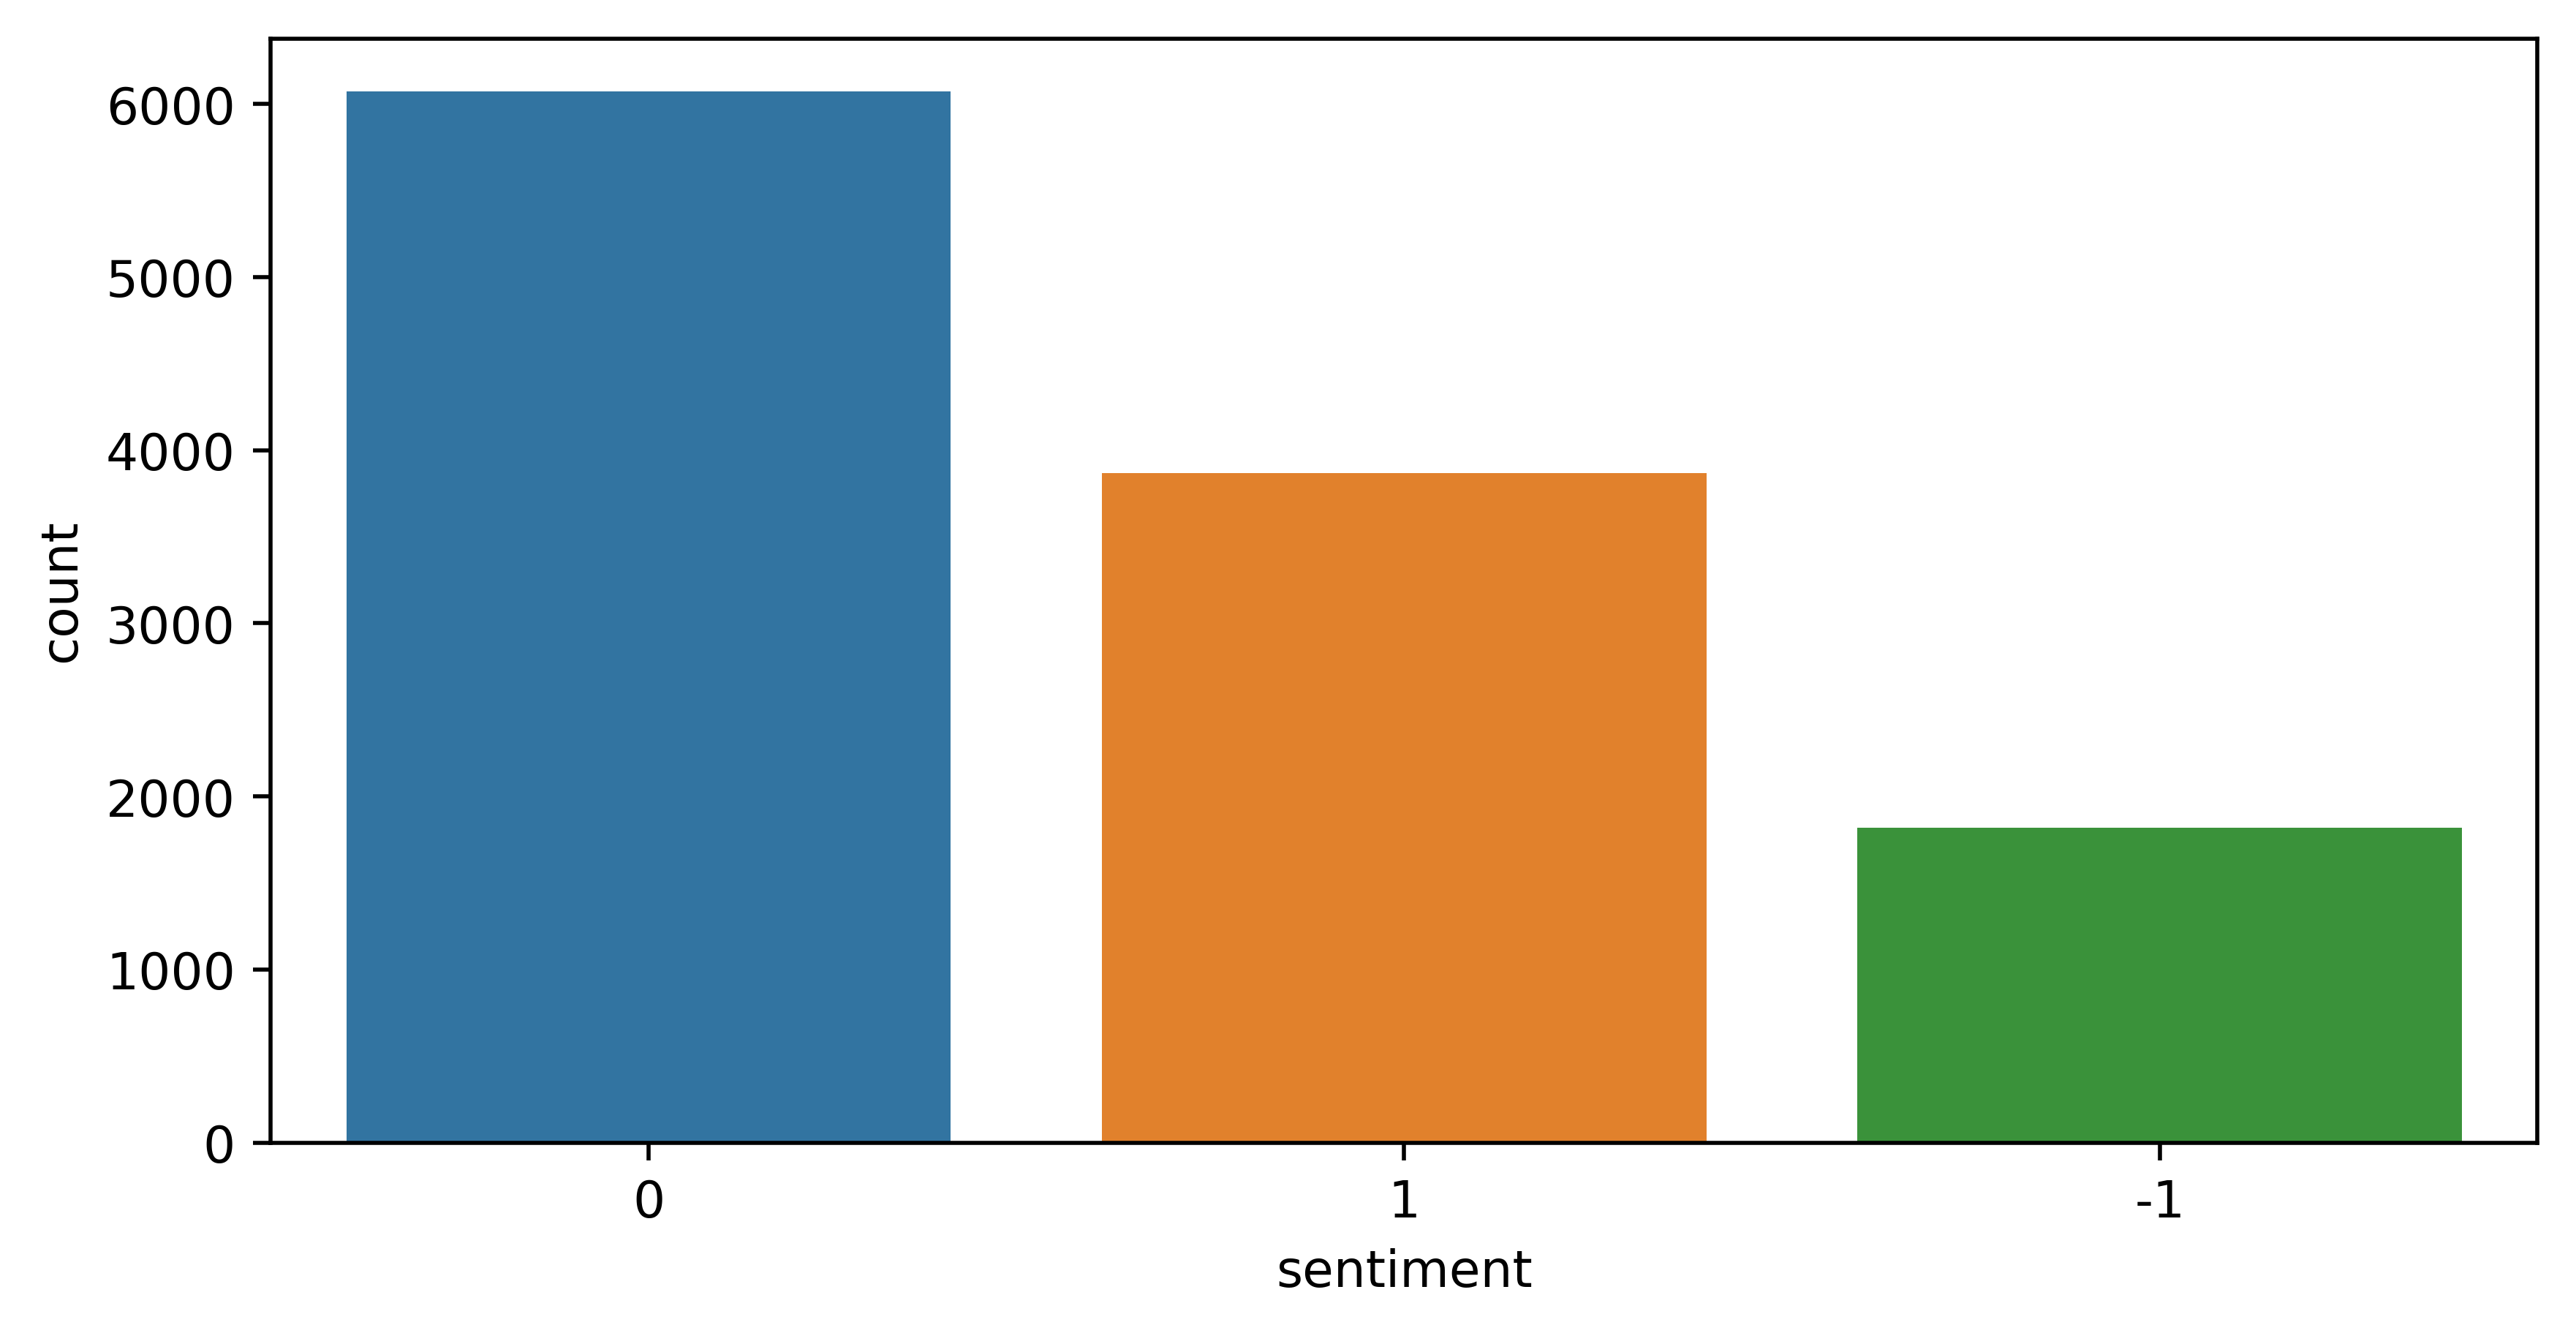

In [ ]:
from matplotlib import pyplot
y = data.sentiment         
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=data.sentiment.value_counts().iloc[:15].index )   
plt.savefig('fig3.png')

# Save preprocessed test  file

In [ ]:
data.to_csv("test_preprocessd_data.csv")

# Validation data preprocessing

In [ ]:
colnames=['Text'] 
data = pd.read_csv('val_text.csv', error_bad_lines=False, names=colnames, header=None)

In [ ]:
data[:2]

,Text
0,Dark Souls 3 April Launch Date Confirmed With ...
1,"National hot dog day, national tequila day, th..."


In [ ]:
data.shape

(1616, 4)

# Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization

In [ ]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['cleanText']=data['Text'].map(lambda s:preprocess(s)) 

# textblob library to extract the polarity score to find sentiments

In [ ]:
# textblob library to extract the polarity score to find sentiments

import nltk
from textblob import  TextBlob
data['Polarity Score']=""
data['sentiment']=""
#df2 = pd.DataFrame(columns=['text', 'sentiment', 'score'])
data['cleanText']=data['cleanText'].astype(str)
for i in range(len(data)):
    sentiment = TextBlob(data['cleanText'][i])
    a=sentiment.sentiment.polarity
    #df2.loc[i] = [data['cleanText'][i]]+[str(0)]+ [a]
    data["Polarity Score"][i]=a

for i in range(len(data)):
    if(data['Polarity Score'][i]>0):
        data['sentiment'][i]=1
    elif(data['Polarity Score'][i]==0):
        data['sentiment'][i]=0
    else:
        data['sentiment'][i]=-1

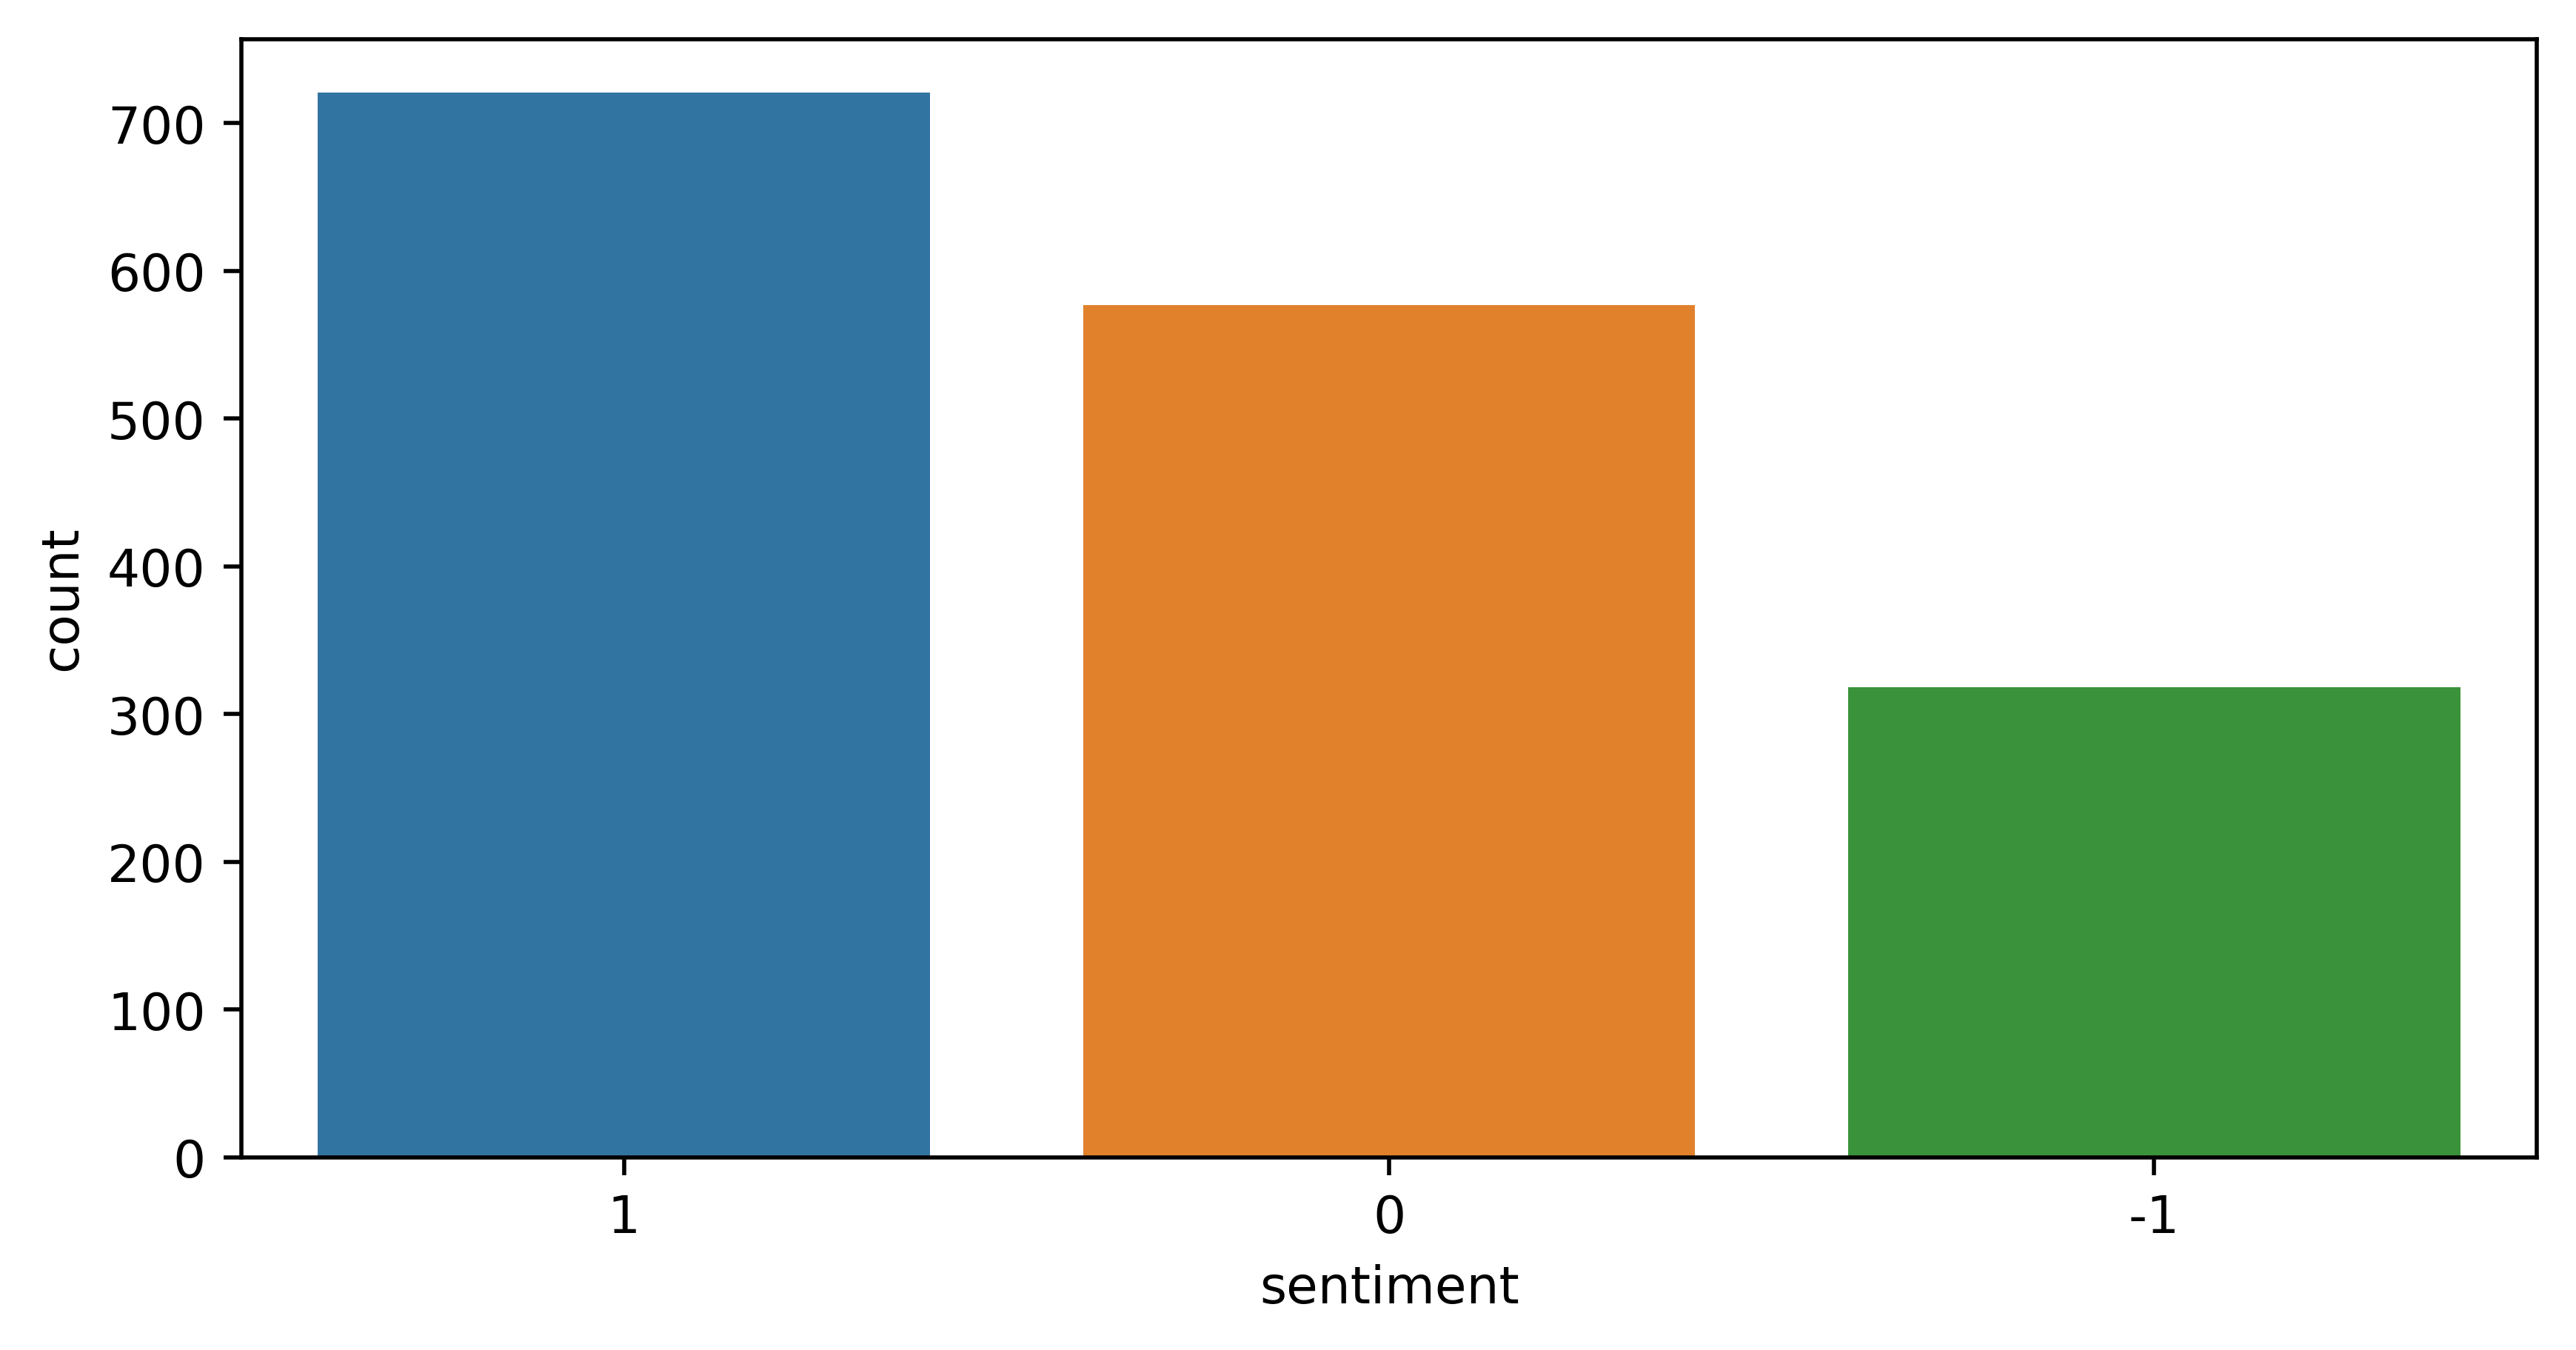

In [ ]:
from matplotlib import pyplot
y = data.sentiment         
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=data.sentiment.value_counts().iloc[:15].index )   
plt.savefig('fig3.png')

# Save Validation data file

In [ ]:
data.to_csv("val_preprocessd_data.csv")